# Prodigy Infotech Datascience Internship - Task 2
#TASK: Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.


## Importing the necessary python libraries and the data set

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv
Saving test.csv to test.csv
Saving gender_submission.csv to gender_submission (1).csv


In [ ]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Basic statistics

In [ ]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# DATA CLEANING

## Check missing values

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


## Check duplicate rows

In [ ]:
df.duplicated().sum()

np.int64(0)

## Drop Columns

In [ ]:
df.drop(columns=['Cabin'], inplace=True)

## Filling missing values

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [ ]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

## Final check after cleaning

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df.shape

(891, 11)

# EXPLORATORY DATA ANALYSIS(EDA)

## Univariate Analysis (One column at a time)

## Survival count

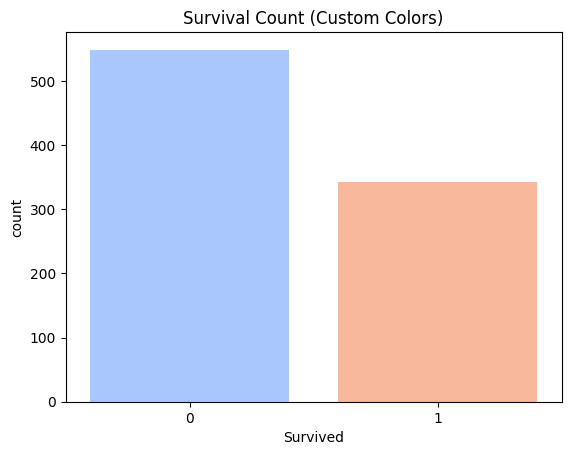

In [ ]:
ax = sns.countplot(x='Survived', data=df)
colors = sns.color_palette('coolwarm', n_colors=df['Survived'].nunique())
for i, bar in enumerate(ax.patches):
    bar.set_facecolor(colors[i])
plt.title("Survival Count (Custom Colors)")
plt.show()

## Age Distribution

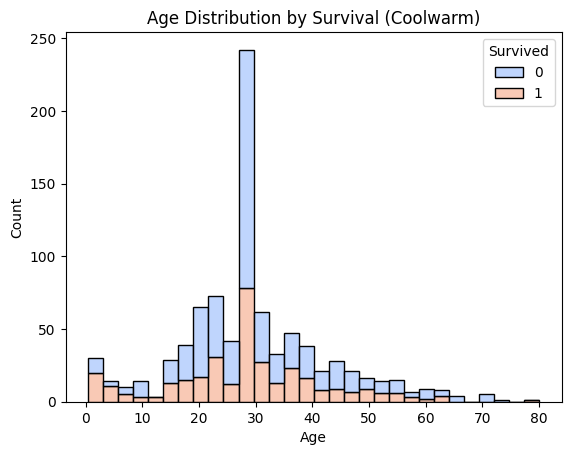

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', palette='coolwarm', bins=30)
plt.title('Age Distribution by Survival (Coolwarm)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('age.png', dpi=300, bbox_inches='tight')
plt.show()
from google.colab import files
files.download('age.png')

## Class Distribution

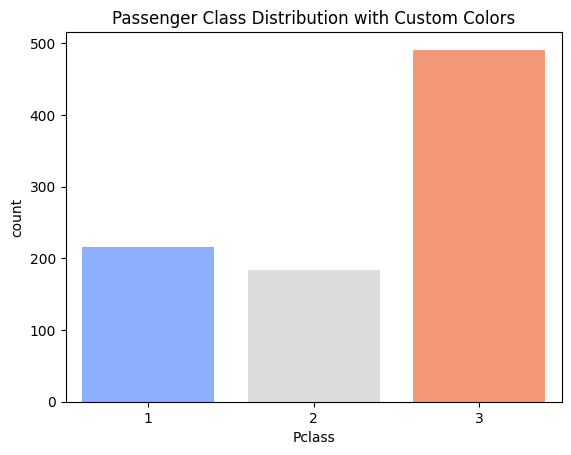

In [ ]:
ax = sns.countplot(x='Pclass', data=df)
colors = sns.color_palette('coolwarm', n_colors=df['Pclass'].nunique())
for i, bar in enumerate(ax.patches):
    bar.set_facecolor(colors[i])
plt.title("Passenger Class Distribution with Custom Colors")
plt.show()

## Bivariate Analysis (Comparing two variables)

## Survival by Gender

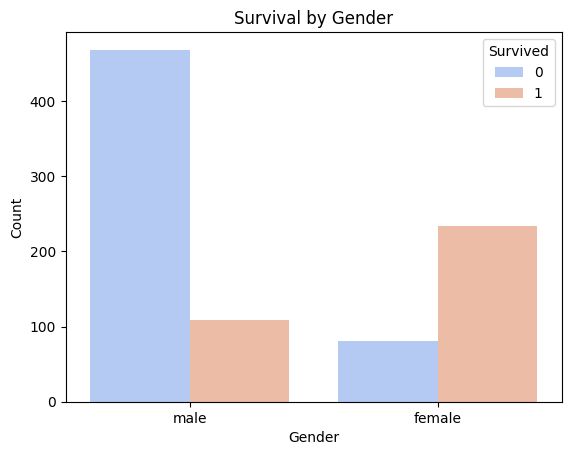

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
sns.countplot(x='Sex', hue='Survived', data=df, palette='coolwarm')
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.savefig('survival_gen.png', dpi=300, bbox_inches='tight')
plt.show()
from google.colab import files
files.download('survival_gen.png')

## Survival by Passenger Class

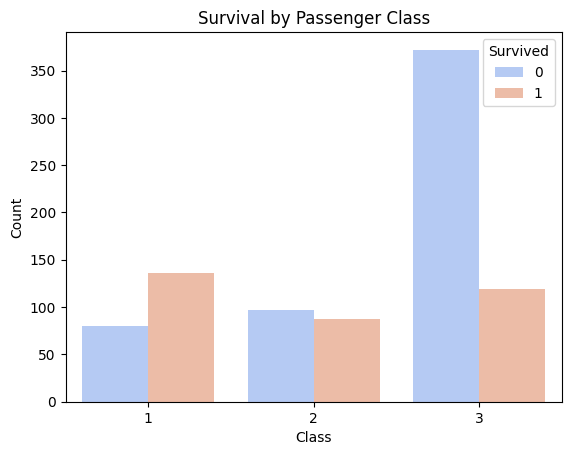

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
sns.countplot(x='Pclass', hue='Survived', data=df, palette='coolwarm')
plt.title('Survival by Passenger Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.savefig('survival_pass.png', dpi=300, bbox_inches='tight')
plt.show()
from google.colab import files
files.download('survival_pass.png')

## Age vs Fare by Survival

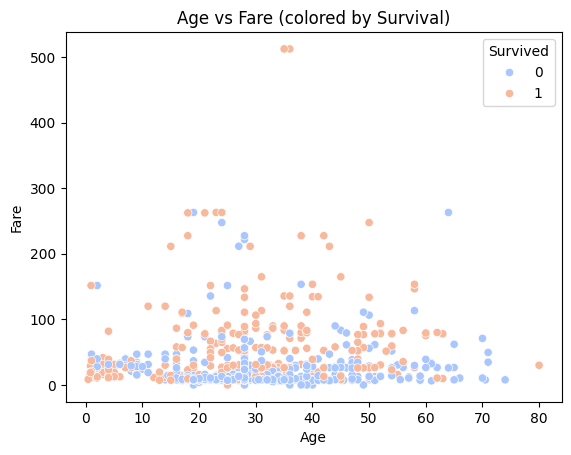

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df, palette='coolwarm')
plt.title('Age vs Fare (colored by Survival)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.savefig('agevsfare.png', dpi=300, bbox_inches='tight')
plt.show()
from google.colab import files
files.download('agevsfare.png')

## Correlation Heatmap

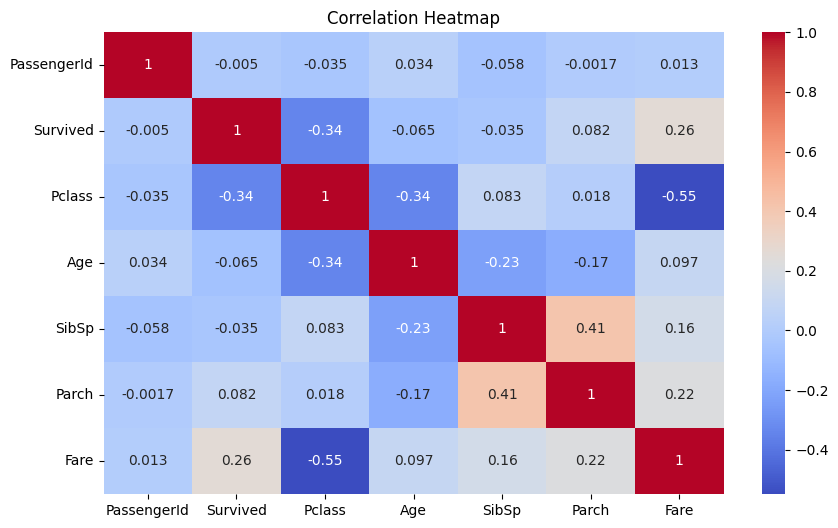

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')
plt.show()
from google.colab import files
files.download('heatmap.png')